In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
#initialize the values
N = 50
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = int((N*N)/2)

In [3]:
def init_MC(N):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    grid = np.zeros((N,N))
    return grid

grid = init_MC(N)

In [62]:
def neighbours_MC(current_pos, grid, neighbours, seed):
    neighbour_candidates = np.array([seed[0]])
    for i in [-1, 1]:
        if current_pos[0] + i >0 or current_pos[0] + i < len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0]+i, current_pos[1]]])
        if current_pos[1]+i == len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], 0]])
        elif current_pos[1]+i == -1:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], len(grid)-1]])
        else:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], current_pos[1]+i]])
    clear = True
    for n in range(1,len(neighbour_candidates)):
        for s in seed:
            if (neighbour_candidates[n]==s).all():
                clear = False
        for ne in neighbours:
            if (neighbour_candidates[n]==ne).all():
                clear = False
        if clear == True:
            neighbours = np.vstack([neighbours, neighbour_candidates[n]])
        else:
            clear = True
    return neighbours

In [76]:
def random_walker(grid, seed, neighbours, max_iter, p_s = 2):
    current_pos = [0, random.randint(0, len(grid)-1)]
    seed_conflict = False
    for i in range(max_iter):
        move_dir = random.randint(0, 4)
        if move_dir == 0:
            new_pos = [current_pos[0]-1, current_pos[1]]
        elif move_dir == 1:
            new_pos = [current_pos[0]+1, current_pos[1]]
        elif move_dir == 2:
            new_pos = [current_pos[0], current_pos[1]+1]
        elif move_dir == 3:
            new_pos = [current_pos[0], current_pos[1]-1]
        print(new_pos)
        if new_pos[0] < 0 or new_pos[0] >= len(grid):
            current_pos = [0, random.randint(0, len(grid)-1)]
        elif new_pos[1] < 0:
            current_pos = [new_pos[0], len(grid)-1]
        elif new_pos[1] >= len(grid):
            current_pos = [new_pos[0], 0]
        for s in seed:
            if (new_pos == s).all():
                seed_conflict = True
        if seed_conflict:
            break
        else:
            current_pos = new_pos
        print(current_pos)
        print(neighbours)
        for j in range(len(neighbours)):
            new_neighbours = neighbours
            if (neighbours[j] == current_pos).all():
                print(True)
#                 print(current_pos)
#                 print(neighbours[j])
                new_s = neighbours[j]
                #print("New_s ", new_s)
                rand = random.random()
                if rand < p_s:
                    seed = np.vstack([seed, new_s])
                     #rint("seed ", seed)
                    grid[new_s[0], new_s[1]] = 1
                     #rint("neighbours1 ", neighbours)
                    neighbours = np.delete(neighbours, j, axis = 0)
                     #rint("neighbours2 ", neighbours)
                    neighbours = neighbours_MC(current_pos, grid, neighbours, seed)
                     #rint("neighbours3 ", neighbours)
                    current_pos = [0, random.randint(0, len(grid)-1)]
                break
        # stopping condition for when our seed reaches the top of the grid
        for s in seed:
            if s[0]==0:
                break
        else:
            continue
        break
    return(grid)

In [71]:
N = 20
grid2 = init_MC(N)

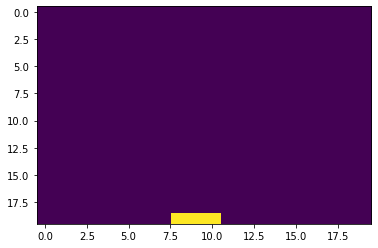

In [65]:
plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
plt.show()

In [77]:
Y = np.copy(grid2)
seed = np.array([[N-1,round((N-1)/2)]])
Y[seed[0, 0],seed[0, 1]] = 1
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
Y = random_walker(Y, seed, neighbours, 50000000)
plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


[-1, 6]
[-1, 6]
[[18 10]
 [19  9]
 [19 11]]
[-1, 7]
[-1, 7]
[[18 10]
 [19  9]
 [19 11]]
[-2, 7]
[-2, 7]
[[18 10]
 [19  9]
 [19 11]]
[-3, 7]
[-3, 7]
[[18 10]
 [19  9]
 [19 11]]
[-4, 7]
[-4, 7]
[[18 10]
 [19  9]
 [19 11]]
[-4, 8]
[-4, 8]
[[18 10]
 [19  9]
 [19 11]]
[-3, 8]
[-3, 8]
[[18 10]
 [19  9]
 [19 11]]
[-3, 9]
[-3, 9]
[[18 10]
 [19  9]
 [19 11]]
[-3, 10]
[-3, 10]
[[18 10]
 [19  9]
 [19 11]]
[-4, 10]
[-4, 10]
[[18 10]
 [19  9]
 [19 11]]
[-5, 10]
[-5, 10]
[[18 10]
 [19  9]
 [19 11]]
[-5, 9]
[-5, 9]
[[18 10]
 [19  9]
 [19 11]]
[-5, 10]
[-5, 10]
[[18 10]
 [19  9]
 [19 11]]
[-5, 11]
[-5, 11]
[[18 10]
 [19  9]
 [19 11]]
[-5, 12]
[-5, 12]
[[18 10]
 [19  9]
 [19 11]]
[-4, 12]
[-4, 12]
[[18 10]
 [19  9]
 [19 11]]
[-4, 13]
[-4, 13]
[[18 10]
 [19  9]
 [19 11]]
[-5, 13]
[-5, 13]
[[18 10]
 [19  9]
 [19 11]]
[-4, 13]
[-4, 13]
[[18 10]
 [19  9]
 [19 11]]
[-3, 13]
[-3, 13]
[[18 10]
 [19  9]
 [19 11]]
[-2, 13]
[-2, 13]
[[18 10]
 [19  9]
 [19 11]]
[-2, 14]
[-2, 14]
[[18 10]
 [19  9]
 [19 11]]
[-2, 1

[-12, 19]
[-12, 19]
[[18 10]
 [19  9]
 [19 11]]
[-11, 19]
[-11, 19]
[[18 10]
 [19  9]
 [19 11]]
[-11, 18]
[-11, 18]
[[18 10]
 [19  9]
 [19 11]]
[-11, 19]
[-11, 19]
[[18 10]
 [19  9]
 [19 11]]
[-12, 19]
[-12, 19]
[[18 10]
 [19  9]
 [19 11]]
[-12, 20]
[-12, 20]
[[18 10]
 [19  9]
 [19 11]]
[-11, 20]
[-11, 20]
[[18 10]
 [19  9]
 [19 11]]
[-12, 20]
[-12, 20]
[[18 10]
 [19  9]
 [19 11]]
[-13, 20]
[-13, 20]
[[18 10]
 [19  9]
 [19 11]]
[-14, 20]
[-14, 20]
[[18 10]
 [19  9]
 [19 11]]
[-15, 20]
[-15, 20]
[[18 10]
 [19  9]
 [19 11]]
[-16, 20]
[-16, 20]
[[18 10]
 [19  9]
 [19 11]]
[-17, 20]
[-17, 20]
[[18 10]
 [19  9]
 [19 11]]
[-17, 19]
[-17, 19]
[[18 10]
 [19  9]
 [19 11]]
[-17, 18]
[-17, 18]
[[18 10]
 [19  9]
 [19 11]]
[-17, 19]
[-17, 19]
[[18 10]
 [19  9]
 [19 11]]
[-16, 19]
[-16, 19]
[[18 10]
 [19  9]
 [19 11]]
[-15, 19]
[-15, 19]
[[18 10]
 [19  9]
 [19 11]]
[-15, 18]
[-15, 18]
[[18 10]
 [19  9]
 [19 11]]
[-15, 19]
[-15, 19]
[[18 10]
 [19  9]
 [19 11]]
[-15, 18]
[-15, 18]
[[18 10]
 [19  9]
 [

[-27, 1]
[-27, 1]
[[18 10]
 [19  9]
 [19 11]]
[-27, 0]
[-27, 0]
[[18 10]
 [19  9]
 [19 11]]
[-27, -1]
[-27, -1]
[[18 10]
 [19  9]
 [19 11]]
[-27, 0]
[-27, 0]
[[18 10]
 [19  9]
 [19 11]]
[-27, 1]
[-27, 1]
[[18 10]
 [19  9]
 [19 11]]
[-28, 1]
[-28, 1]
[[18 10]
 [19  9]
 [19 11]]
[-27, 1]
[-27, 1]
[[18 10]
 [19  9]
 [19 11]]
[-26, 1]
[-26, 1]
[[18 10]
 [19  9]
 [19 11]]
[-26, 0]
[-26, 0]
[[18 10]
 [19  9]
 [19 11]]
[-26, 1]
[-26, 1]
[[18 10]
 [19  9]
 [19 11]]
[-27, 1]
[-27, 1]
[[18 10]
 [19  9]
 [19 11]]
[-27, 0]
[-27, 0]
[[18 10]
 [19  9]
 [19 11]]
[-27, -1]
[-27, -1]
[[18 10]
 [19  9]
 [19 11]]
[-28, -1]
[-28, -1]
[[18 10]
 [19  9]
 [19 11]]
[-29, -1]
[-29, -1]
[[18 10]
 [19  9]
 [19 11]]
[-29, 0]
[-29, 0]
[[18 10]
 [19  9]
 [19 11]]
[-29, 1]
[-29, 1]
[[18 10]
 [19  9]
 [19 11]]
[-30, 1]
[-30, 1]
[[18 10]
 [19  9]
 [19 11]]
[-30, 2]
[-30, 2]
[[18 10]
 [19  9]
 [19 11]]
[-31, 2]
[-31, 2]
[[18 10]
 [19  9]
 [19 11]]
[-30, 2]
[-30, 2]
[[18 10]
 [19  9]
 [19 11]]
[-31, 2]
[-31, 2]
[[18 10]

 [19 11]]
[-15, -22]
[-15, -22]
[[18 10]
 [19  9]
 [19 11]]
[-15, -23]
[-15, -23]
[[18 10]
 [19  9]
 [19 11]]
[-14, -23]
[-14, -23]
[[18 10]
 [19  9]
 [19 11]]
[-14, -22]
[-14, -22]
[[18 10]
 [19  9]
 [19 11]]
[-13, -22]
[-13, -22]
[[18 10]
 [19  9]
 [19 11]]
[-12, -22]
[-12, -22]
[[18 10]
 [19  9]
 [19 11]]
[-12, -23]
[-12, -23]
[[18 10]
 [19  9]
 [19 11]]
[-11, -23]
[-11, -23]
[[18 10]
 [19  9]
 [19 11]]
[-12, -23]
[-12, -23]
[[18 10]
 [19  9]
 [19 11]]
[-12, -22]
[-12, -22]
[[18 10]
 [19  9]
 [19 11]]
[-13, -22]
[-13, -22]
[[18 10]
 [19  9]
 [19 11]]
[-13, -21]
[-13, -21]
[[18 10]
 [19  9]
 [19 11]]
[-13, -20]
[-13, -20]
[[18 10]
 [19  9]
 [19 11]]
[-13, -19]
[-13, -19]
[[18 10]
 [19  9]
 [19 11]]
[-12, -19]
[-12, -19]
[[18 10]
 [19  9]
 [19 11]]
[-11, -19]
[-11, -19]
[[18 10]
 [19  9]
 [19 11]]
[-12, -19]
[-12, -19]
[[18 10]
 [19  9]
 [19 11]]
[-13, -19]
[-13, -19]
[[18 10]
 [19  9]
 [19 11]]
[-12, -19]
[-12, -19]
[[18 10]
 [19  9]
 [19 11]]
[-12, -18]
[-12, -18]
[[18 10]
 [19  9]


[[18 10]
 [19  9]
 [19 11]]
[0, -12]
[0, -12]
[[18 10]
 [19  9]
 [19 11]]
[-1, -12]
[-1, -12]
[[18 10]
 [19  9]
 [19 11]]
[-1, -11]
[-1, -11]
[[18 10]
 [19  9]
 [19 11]]
[0, -11]
[0, -11]
[[18 10]
 [19  9]
 [19 11]]
[0, -10]
[0, -10]
[[18 10]
 [19  9]
 [19 11]]
[1, -10]
[1, -10]
[[18 10]
 [19  9]
 [19 11]]
[2, -10]
[2, -10]
[[18 10]
 [19  9]
 [19 11]]
[2, -9]
[2, -9]
[[18 10]
 [19  9]
 [19 11]]
[2, -8]
[2, -8]
[[18 10]
 [19  9]
 [19 11]]
[3, -8]
[3, -8]
[[18 10]
 [19  9]
 [19 11]]
[4, -8]
[4, -8]
[[18 10]
 [19  9]
 [19 11]]
[4, -7]
[4, -7]
[[18 10]
 [19  9]
 [19 11]]
[4, -6]
[4, -6]
[[18 10]
 [19  9]
 [19 11]]
[4, -7]
[4, -7]
[[18 10]
 [19  9]
 [19 11]]
[4, -6]
[4, -6]
[[18 10]
 [19  9]
 [19 11]]
[5, -6]
[5, -6]
[[18 10]
 [19  9]
 [19 11]]
[4, -6]
[4, -6]
[[18 10]
 [19  9]
 [19 11]]
[4, -5]
[4, -5]
[[18 10]
 [19  9]
 [19 11]]
[3, -5]
[3, -5]
[[18 10]
 [19  9]
 [19 11]]
[4, -5]
[4, -5]
[[18 10]
 [19  9]
 [19 11]]
[3, -5]
[3, -5]
[[18 10]
 [19  9]
 [19 11]]
[4, -5]
[4, -5]
[[18 10]
 [19 

[[18 10]
 [19  9]
 [19 11]]
[18, -2]
[18, -2]
[[18 10]
 [19  9]
 [19 11]]
[19, -2]
[19, -2]
[[18 10]
 [19  9]
 [19 11]]
[19, -3]
[19, -3]
[[18 10]
 [19  9]
 [19 11]]
[19, -2]
[19, -2]
[[18 10]
 [19  9]
 [19 11]]
[20, -2]
[20, -2]
[[18 10]
 [19  9]
 [19 11]]
[21, -2]
[21, -2]
[[18 10]
 [19  9]
 [19 11]]
[20, -2]
[20, -2]
[[18 10]
 [19  9]
 [19 11]]
[20, -3]
[20, -3]
[[18 10]
 [19  9]
 [19 11]]
[20, -2]
[20, -2]
[[18 10]
 [19  9]
 [19 11]]
[19, -2]
[19, -2]
[[18 10]
 [19  9]
 [19 11]]
[20, -2]
[20, -2]
[[18 10]
 [19  9]
 [19 11]]
[20, -1]
[20, -1]
[[18 10]
 [19  9]
 [19 11]]
[20, -2]
[20, -2]
[[18 10]
 [19  9]
 [19 11]]
[19, -2]
[19, -2]
[[18 10]
 [19  9]
 [19 11]]
[18, -2]
[18, -2]
[[18 10]
 [19  9]
 [19 11]]
[17, -2]
[17, -2]
[[18 10]
 [19  9]
 [19 11]]
[16, -2]
[16, -2]
[[18 10]
 [19  9]
 [19 11]]
[15, -2]
[15, -2]
[[18 10]
 [19  9]
 [19 11]]
[15, -1]
[15, -1]
[[18 10]
 [19  9]
 [19 11]]
[16, -1]
[16, -1]
[[18 10]
 [19  9]
 [19 11]]
[16, -2]
[16, -2]
[[18 10]
 [19  9]
 [19 11]]
[16, -

 [19 11]]
[29, 12]
[29, 12]
[[18 10]
 [19  9]
 [19 11]]
[28, 12]
[28, 12]
[[18 10]
 [19  9]
 [19 11]]
[29, 12]
[29, 12]
[[18 10]
 [19  9]
 [19 11]]
[29, 11]
[29, 11]
[[18 10]
 [19  9]
 [19 11]]
[29, 10]
[29, 10]
[[18 10]
 [19  9]
 [19 11]]
[28, 10]
[28, 10]
[[18 10]
 [19  9]
 [19 11]]
[28, 9]
[28, 9]
[[18 10]
 [19  9]
 [19 11]]
[29, 9]
[29, 9]
[[18 10]
 [19  9]
 [19 11]]
[28, 9]
[28, 9]
[[18 10]
 [19  9]
 [19 11]]
[29, 9]
[29, 9]
[[18 10]
 [19  9]
 [19 11]]
[29, 8]
[29, 8]
[[18 10]
 [19  9]
 [19 11]]
[28, 8]
[28, 8]
[[18 10]
 [19  9]
 [19 11]]
[27, 8]
[27, 8]
[[18 10]
 [19  9]
 [19 11]]
[27, 7]
[27, 7]
[[18 10]
 [19  9]
 [19 11]]
[28, 7]
[28, 7]
[[18 10]
 [19  9]
 [19 11]]
[27, 7]
[27, 7]
[[18 10]
 [19  9]
 [19 11]]
[27, 6]
[27, 6]
[[18 10]
 [19  9]
 [19 11]]
[27, 7]
[27, 7]
[[18 10]
 [19  9]
 [19 11]]
[28, 7]
[28, 7]
[[18 10]
 [19  9]
 [19 11]]
[29, 7]
[29, 7]
[[18 10]
 [19  9]
 [19 11]]
[30, 7]
[30, 7]
[[18 10]
 [19  9]
 [19 11]]
[29, 7]
[29, 7]
[[18 10]
 [19  9]
 [19 11]]
[29, 6]
[2

[[18 10]
 [19  9]
 [19 11]]
[43, -5]
[43, -5]
[[18 10]
 [19  9]
 [19 11]]
[44, -5]
[44, -5]
[[18 10]
 [19  9]
 [19 11]]
[43, -5]
[43, -5]
[[18 10]
 [19  9]
 [19 11]]
[43, -6]
[43, -6]
[[18 10]
 [19  9]
 [19 11]]
[44, -6]
[44, -6]
[[18 10]
 [19  9]
 [19 11]]
[43, -6]
[43, -6]
[[18 10]
 [19  9]
 [19 11]]
[42, -6]
[42, -6]
[[18 10]
 [19  9]
 [19 11]]
[42, -7]
[42, -7]
[[18 10]
 [19  9]
 [19 11]]
[43, -7]
[43, -7]
[[18 10]
 [19  9]
 [19 11]]
[43, -6]
[43, -6]
[[18 10]
 [19  9]
 [19 11]]
[44, -6]
[44, -6]
[[18 10]
 [19  9]
 [19 11]]
[43, -6]
[43, -6]
[[18 10]
 [19  9]
 [19 11]]
[44, -6]
[44, -6]
[[18 10]
 [19  9]
 [19 11]]
[43, -6]
[43, -6]
[[18 10]
 [19  9]
 [19 11]]
[42, -6]
[42, -6]
[[18 10]
 [19  9]
 [19 11]]
[42, -7]
[42, -7]
[[18 10]
 [19  9]
 [19 11]]
[43, -7]
[43, -7]
[[18 10]
 [19  9]
 [19 11]]
[42, -7]
[42, -7]
[[18 10]
 [19  9]
 [19 11]]
[42, -8]
[42, -8]
[[18 10]
 [19  9]
 [19 11]]
[43, -8]
[43, -8]
[[18 10]
 [19  9]
 [19 11]]
[44, -8]
[44, -8]
[[18 10]
 [19  9]
 [19 11]]
[44, -

[15, -22]
[15, -22]
[[18 10]
 [19  9]
 [19 11]]
[15, -21]
[15, -21]
[[18 10]
 [19  9]
 [19 11]]
[15, -20]
[15, -20]
[[18 10]
 [19  9]
 [19 11]]
[15, -21]
[15, -21]
[[18 10]
 [19  9]
 [19 11]]
[15, -22]
[15, -22]
[[18 10]
 [19  9]
 [19 11]]
[15, -23]
[15, -23]
[[18 10]
 [19  9]
 [19 11]]
[15, -24]
[15, -24]
[[18 10]
 [19  9]
 [19 11]]
[14, -24]
[14, -24]
[[18 10]
 [19  9]
 [19 11]]
[14, -25]
[14, -25]
[[18 10]
 [19  9]
 [19 11]]
[13, -25]
[13, -25]
[[18 10]
 [19  9]
 [19 11]]
[14, -25]
[14, -25]
[[18 10]
 [19  9]
 [19 11]]
[15, -25]
[15, -25]
[[18 10]
 [19  9]
 [19 11]]
[15, -26]
[15, -26]
[[18 10]
 [19  9]
 [19 11]]
[15, -27]
[15, -27]
[[18 10]
 [19  9]
 [19 11]]
[16, -27]
[16, -27]
[[18 10]
 [19  9]
 [19 11]]
[16, -26]
[16, -26]
[[18 10]
 [19  9]
 [19 11]]
[17, -26]
[17, -26]
[[18 10]
 [19  9]
 [19 11]]
[17, -25]
[17, -25]
[[18 10]
 [19  9]
 [19 11]]
[17, -24]
[17, -24]
[[18 10]
 [19  9]
 [19 11]]
[18, -24]
[18, -24]
[[18 10]
 [19  9]
 [19 11]]
[17, -24]
[17, -24]
[[18 10]
 [19  9]
 [

[13, -17]
[[18 10]
 [19  9]
 [19 11]]
[13, -18]
[13, -18]
[[18 10]
 [19  9]
 [19 11]]
[13, -19]
[13, -19]
[[18 10]
 [19  9]
 [19 11]]
[12, -19]
[12, -19]
[[18 10]
 [19  9]
 [19 11]]
[13, -19]
[13, -19]
[[18 10]
 [19  9]
 [19 11]]
[13, -20]
[13, -20]
[[18 10]
 [19  9]
 [19 11]]
[13, -19]
[13, -19]
[[18 10]
 [19  9]
 [19 11]]
[12, -19]
[12, -19]
[[18 10]
 [19  9]
 [19 11]]
[11, -19]
[11, -19]
[[18 10]
 [19  9]
 [19 11]]
[12, -19]
[12, -19]
[[18 10]
 [19  9]
 [19 11]]
[11, -19]
[11, -19]
[[18 10]
 [19  9]
 [19 11]]
[11, -20]
[11, -20]
[[18 10]
 [19  9]
 [19 11]]
[12, -20]
[12, -20]
[[18 10]
 [19  9]
 [19 11]]
[12, -19]
[12, -19]
[[18 10]
 [19  9]
 [19 11]]
[12, -18]
[12, -18]
[[18 10]
 [19  9]
 [19 11]]
[12, -19]
[12, -19]
[[18 10]
 [19  9]
 [19 11]]
[13, -19]
[13, -19]
[[18 10]
 [19  9]
 [19 11]]
[13, -20]
[13, -20]
[[18 10]
 [19  9]
 [19 11]]
[14, -20]
[14, -20]
[[18 10]
 [19  9]
 [19 11]]
[14, -19]
[14, -19]
[[18 10]
 [19  9]
 [19 11]]
[13, -19]
[13, -19]
[[18 10]
 [19  9]
 [19 11]]
[1

[50, -14]
[50, -14]
[[18 10]
 [19  9]
 [19 11]]
[50, -15]
[50, -15]
[[18 10]
 [19  9]
 [19 11]]
[50, -16]
[50, -16]
[[18 10]
 [19  9]
 [19 11]]
[50, -17]
[50, -17]
[[18 10]
 [19  9]
 [19 11]]
[49, -17]
[49, -17]
[[18 10]
 [19  9]
 [19 11]]
[49, -16]
[49, -16]
[[18 10]
 [19  9]
 [19 11]]
[48, -16]
[48, -16]
[[18 10]
 [19  9]
 [19 11]]
[48, -17]
[48, -17]
[[18 10]
 [19  9]
 [19 11]]
[48, -16]
[48, -16]
[[18 10]
 [19  9]
 [19 11]]
[49, -16]
[49, -16]
[[18 10]
 [19  9]
 [19 11]]
[49, -17]
[49, -17]
[[18 10]
 [19  9]
 [19 11]]
[49, -18]
[49, -18]
[[18 10]
 [19  9]
 [19 11]]
[50, -18]
[50, -18]
[[18 10]
 [19  9]
 [19 11]]
[50, -19]
[50, -19]
[[18 10]
 [19  9]
 [19 11]]
[50, -20]
[50, -20]
[[18 10]
 [19  9]
 [19 11]]
[49, -20]
[49, -20]
[[18 10]
 [19  9]
 [19 11]]
[48, -20]
[48, -20]
[[18 10]
 [19  9]
 [19 11]]
[47, -20]
[47, -20]
[[18 10]
 [19  9]
 [19 11]]
[47, -21]
[47, -21]
[[18 10]
 [19  9]
 [19 11]]
[47, -20]
[47, -20]
[[18 10]
 [19  9]
 [19 11]]
[47, -19]
[47, -19]
[[18 10]
 [19  9]
 [

[45, -8]
[45, -8]
[[18 10]
 [19  9]
 [19 11]]
[45, -9]
[45, -9]
[[18 10]
 [19  9]
 [19 11]]
[45, -8]
[45, -8]
[[18 10]
 [19  9]
 [19 11]]
[45, -7]
[45, -7]
[[18 10]
 [19  9]
 [19 11]]
[45, -8]
[45, -8]
[[18 10]
 [19  9]
 [19 11]]
[46, -8]
[46, -8]
[[18 10]
 [19  9]
 [19 11]]
[47, -8]
[47, -8]
[[18 10]
 [19  9]
 [19 11]]
[47, -9]
[47, -9]
[[18 10]
 [19  9]
 [19 11]]
[48, -9]
[48, -9]
[[18 10]
 [19  9]
 [19 11]]
[47, -9]
[47, -9]
[[18 10]
 [19  9]
 [19 11]]
[47, -8]
[47, -8]
[[18 10]
 [19  9]
 [19 11]]
[46, -8]
[46, -8]
[[18 10]
 [19  9]
 [19 11]]
[46, -7]
[46, -7]
[[18 10]
 [19  9]
 [19 11]]
[46, -8]
[46, -8]
[[18 10]
 [19  9]
 [19 11]]
[46, -9]
[46, -9]
[[18 10]
 [19  9]
 [19 11]]
[46, -10]
[46, -10]
[[18 10]
 [19  9]
 [19 11]]
[46, -9]
[46, -9]
[[18 10]
 [19  9]
 [19 11]]
[46, -8]
[46, -8]
[[18 10]
 [19  9]
 [19 11]]
[46, -7]
[46, -7]
[[18 10]
 [19  9]
 [19 11]]
[46, -8]
[46, -8]
[[18 10]
 [19  9]
 [19 11]]
[45, -8]
[45, -8]
[[18 10]
 [19  9]
 [19 11]]
[44, -8]
[44, -8]
[[18 10]
 [19 

 [19 11]]
[35, 0]
[35, 0]
[[18 10]
 [19  9]
 [19 11]]
[36, 0]
[36, 0]
[[18 10]
 [19  9]
 [19 11]]
[37, 0]
[37, 0]
[[18 10]
 [19  9]
 [19 11]]
[37, -1]
[37, -1]
[[18 10]
 [19  9]
 [19 11]]
[38, -1]
[38, -1]
[[18 10]
 [19  9]
 [19 11]]
[39, -1]
[39, -1]
[[18 10]
 [19  9]
 [19 11]]
[39, -2]
[39, -2]
[[18 10]
 [19  9]
 [19 11]]
[39, -1]
[39, -1]
[[18 10]
 [19  9]
 [19 11]]
[40, -1]
[40, -1]
[[18 10]
 [19  9]
 [19 11]]
[39, -1]
[39, -1]
[[18 10]
 [19  9]
 [19 11]]
[39, -2]
[39, -2]
[[18 10]
 [19  9]
 [19 11]]
[39, -3]
[39, -3]
[[18 10]
 [19  9]
 [19 11]]
[40, -3]
[40, -3]
[[18 10]
 [19  9]
 [19 11]]
[41, -3]
[41, -3]
[[18 10]
 [19  9]
 [19 11]]
[41, -4]
[41, -4]
[[18 10]
 [19  9]
 [19 11]]
[41, -5]
[41, -5]
[[18 10]
 [19  9]
 [19 11]]
[41, -6]
[41, -6]
[[18 10]
 [19  9]
 [19 11]]
[41, -7]
[41, -7]
[[18 10]
 [19  9]
 [19 11]]
[41, -8]
[41, -8]
[[18 10]
 [19  9]
 [19 11]]
[40, -8]
[40, -8]
[[18 10]
 [19  9]
 [19 11]]
[39, -8]
[39, -8]
[[18 10]
 [19  9]
 [19 11]]
[40, -8]
[40, -8]
[[18 10]
 [1

 [19 11]]
[28, 4]
[28, 4]
[[18 10]
 [19  9]
 [19 11]]
[27, 4]
[27, 4]
[[18 10]
 [19  9]
 [19 11]]
[27, 5]
[27, 5]
[[18 10]
 [19  9]
 [19 11]]
[26, 5]
[26, 5]
[[18 10]
 [19  9]
 [19 11]]
[25, 5]
[25, 5]
[[18 10]
 [19  9]
 [19 11]]
[25, 4]
[25, 4]
[[18 10]
 [19  9]
 [19 11]]
[25, 3]
[25, 3]
[[18 10]
 [19  9]
 [19 11]]
[25, 2]
[25, 2]
[[18 10]
 [19  9]
 [19 11]]
[25, 3]
[25, 3]
[[18 10]
 [19  9]
 [19 11]]
[25, 4]
[25, 4]
[[18 10]
 [19  9]
 [19 11]]
[26, 4]
[26, 4]
[[18 10]
 [19  9]
 [19 11]]
[25, 4]
[25, 4]
[[18 10]
 [19  9]
 [19 11]]
[25, 3]
[25, 3]
[[18 10]
 [19  9]
 [19 11]]
[26, 3]
[26, 3]
[[18 10]
 [19  9]
 [19 11]]
[26, 4]
[26, 4]
[[18 10]
 [19  9]
 [19 11]]
[25, 4]
[25, 4]
[[18 10]
 [19  9]
 [19 11]]
[25, 3]
[25, 3]
[[18 10]
 [19  9]
 [19 11]]
[25, 4]
[25, 4]
[[18 10]
 [19  9]
 [19 11]]
[26, 4]
[26, 4]
[[18 10]
 [19  9]
 [19 11]]
[27, 4]
[27, 4]
[[18 10]
 [19  9]
 [19 11]]
[28, 4]
[28, 4]
[[18 10]
 [19  9]
 [19 11]]
[28, 5]
[28, 5]
[[18 10]
 [19  9]
 [19 11]]
[29, 5]
[29, 5]
[[18 1

 [19 12]]
[-15, 36]
[-15, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 36]
[-14, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 37]
[-14, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 37]
[-13, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 36]
[-13, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 36]
[-12, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 35]
[-12, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 36]
[-12, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 36]
[-11, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 37]
[-11, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 38]
[-11, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 38]
[-10, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 38]
[-9, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 37]
[-9, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 36]
[-9, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 

 [19 12]]
[-37, 35]
[-37, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, 36]
[-37, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, 37]
[-37, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, 36]
[-37, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, 36]
[-38, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, 35]
[-38, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, 35]
[-39, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 35]
[-40, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 36]
[-40, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 35]
[-40, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 36]
[-40, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, 36]
[-39, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, 35]
[-39, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 35]
[-40, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, 34]
[-40, 34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


[-32, 20]
[-32, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 20]
[-31, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, 20]
[-30, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 20]
[-31, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 20]
[-32, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 21]
[-32, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 20]
[-32, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 20]
[-31, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 20]
[-32, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 20]
[-31, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 19]
[-31, 19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 18]
[-31, 18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 17]
[-31, 17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, 18]
[-31, 18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 18]
[-32, 18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, 19]


 [19 12]]
[-24, 38]
[-24, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, 38]
[-23, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, 39]
[-23, 39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-22, 39]
[-22, 39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-21, 39]
[-21, 39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-21, 38]
[-21, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-22, 38]
[-22, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, 38]
[-23, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, 38]
[-24, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, 37]
[-24, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, 36]
[-24, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, 36]
[-25, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, 36]
[-24, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, 36]
[-23, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-22, 36]
[-22, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


[-12, 48]
[-12, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 48]
[-13, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 48]
[-12, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 48]
[-13, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 48]
[-12, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 48]
[-11, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 48]
[-10, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 47]
[-10, 47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 48]
[-10, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 48]
[-11, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 47]
[-11, 47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 47]
[-12, 47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 48]
[-12, 48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 49]
[-12, 49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 49]
[-13, 49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 49]


 [19 12]]
[-5, 36]
[-5, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, 36]
[-4, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, 35]
[-4, 35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, 36]
[-4, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 36]
[-5, 36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 37]
[-5, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 38]
[-5, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, 38]
[-6, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, 37]
[-6, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, 38]
[-6, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, 37]
[-6, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 37]
[-5, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, 37]
[-4, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 37]
[-5, 37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-5, 38]
[-5, 38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, 38]
[-6, 38]
[[18 10]
 [1

 [19 12]]
[-14, 21]
[-14, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 20]
[-14, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 19]
[-14, 19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 20]
[-14, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 21]
[-14, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 22]
[-14, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 22]
[-15, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 23]
[-15, 23]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 22]
[-15, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 21]
[-15, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 21]
[-14, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 20]
[-14, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 20]
[-13, 20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 19]
[-13, 19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 19]
[-12, 19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


 [19 12]]
[-8, 44]
[-8, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, 45]
[-8, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 45]
[-9, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 45]
[-10, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 44]
[-10, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 44]
[-9, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, 44]
[-8, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, 44]
[-9, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, 44]
[-10, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 44]
[-11, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 45]
[-11, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 44]
[-11, 44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 45]
[-11, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 45]
[-12, 45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 46]
[-12, 46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 45]
[-

[-13, 25]
[-13, 25]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 24]
[-13, 24]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 24]
[-12, 24]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 24]
[-13, 24]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 24]
[-14, 24]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 23]
[-14, 23]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 23]
[-15, 23]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 23]
[-14, 23]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 22]
[-14, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 22]
[-13, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 21]
[-13, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 21]
[-12, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 22]
[-12, 22]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-12, 21]
[-12, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 21]
[-11, 21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-11, 20]


 [19 12]]
[-26, 30]
[-26, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, 30]
[-27, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 30]
[-26, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 29]
[-26, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 28]
[-26, 28]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 29]
[-26, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, 29]
[-27, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 29]
[-26, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 28]
[-26, 28]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, 29]
[-26, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, 29]
[-27, 29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, 30]
[-27, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-28, 30]
[-28, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-28, 31]
[-28, 31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-28, 30]
[-28, 30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


[-17, 16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, 16]
[-16, 16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 16]
[-15, 16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 15]
[-15, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 15]
[-14, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 15]
[-13, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-13, 14]
[-13, 14]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 14]
[-14, 14]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 15]
[-14, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 16]
[-14, 16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-14, 15]
[-14, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 15]
[-15, 15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 16]
[-15, 16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 17]
[-15, 17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, 18]
[-15, 18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, 18]
[-16, 18]


 [19 12]]
[0, 6]
[0, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, 5]
[0, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 5]
[-1, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, 5]
[0, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 5]
[-1, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, 5]
[0, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, 6]
[0, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 6]
[-1, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, 6]
[0, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 6]
[-1, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 5]
[-1, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 6]
[-1, 6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, 5]
[-1, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, 5]
[-2, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, 5]
[-3, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, 5]
[-2, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, 5]
[-

[30, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[31, 5]
[31, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[30, 5]
[30, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[30, 4]
[30, 4]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 4]
[29, 4]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 4]
[28, 4]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 5]
[28, 5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 4]
[28, 4]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 4]
[29, 4]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 3]
[29, 3]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 2]
[29, 2]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 2]
[28, 2]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 2]
[29, 2]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 3]
[29, 3]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[29, 2]
[29, 2]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 2]
[28, 2]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[28, 1]
[28, 1]


[23, -7]
[23, -7]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -6]
[23, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -7]
[23, -7]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -6]
[23, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -6]
[22, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -5]
[22, -5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -6]
[22, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -7]
[22, -7]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -8]
[22, -8]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -7]
[22, -7]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -6]
[22, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -6]
[23, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -5]
[23, -5]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -6]
[23, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -6]
[22, -6]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -7]
[22, -7]
[[18 10]
 [19  9]
 [18

 [19 12]]
[8, -15]
[8, -15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -14]
[8, -14]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -15]
[8, -15]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -16]
[8, -16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -16]
[7, -16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -16]
[6, -16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -17]
[6, -17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -18]
[6, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -18]
[7, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -18]
[8, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -19]
[8, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[9, -19]
[9, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -19]
[8, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -20]
[8, -20]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -21]
[8, -21]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -21]
[7, -21]
[[18 10]
 [1

[25, -36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -36]
[24, -36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -37]
[24, -37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[25, -37]
[25, -37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[25, -38]
[25, -38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -38]
[24, -38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -39]
[24, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -39]
[23, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -39]
[24, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[25, -39]
[25, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[25, -40]
[25, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[24, -40]
[24, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -40]
[23, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[23, -41]
[23, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -41]
[22, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[22, -42]
[22, -42]


[34, -53]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[34, -54]
[34, -54]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[34, -55]
[34, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[35, -55]
[35, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[36, -55]
[36, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[37, -55]
[37, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -55]
[38, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -56]
[38, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -55]
[38, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -56]
[38, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[39, -56]
[39, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[39, -57]
[39, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -57]
[38, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[38, -56]
[38, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[37, -56]
[37, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[37, -55]
[37, -55]


[36, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[35, -47]
[35, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[34, -47]
[34, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[34, -48]
[34, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -48]
[33, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -49]
[33, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -50]
[33, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -49]
[33, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -50]
[33, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -51]
[33, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[34, -51]
[34, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -51]
[33, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -50]
[33, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -49]
[33, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[33, -50]
[33, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[32, -50]
[32, -50]


 [19 12]]
[3, -39]
[3, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[3, -40]
[3, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -40]
[2, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -39]
[2, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -40]
[2, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -41]
[2, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -42]
[2, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -41]
[2, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -42]
[2, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -42]
[1, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -43]
[1, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -43]
[2, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -43]
[1, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -43]
[0, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -42]
[0, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -41]
[0, -41]
[[18 10]
 [1

 [19 12]]
[-20, -39]
[-20, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -38]
[-20, -38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -37]
[-20, -37]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -36]
[-20, -36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -35]
[-20, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -35]
[-19, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -35]
[-20, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-21, -35]
[-21, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-22, -35]
[-22, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, -35]
[-23, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -35]
[-24, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -34]
[-24, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -34]
[-25, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -34]
[-24, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -33]
[-24, -33]
[[18 10]
 [19  9

[-2, -47]
[-2, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -46]
[-2, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -47]
[-2, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -48]
[-2, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -48]
[-3, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -48]
[-2, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -47]
[-2, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, -47]
[-1, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, -46]
[-1, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -46]
[-2, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, -46]
[-1, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -46]
[-2, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -47]
[-2, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -48]
[-2, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -49]
[-2, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -48]


 [19 12]]
[13, -66]
[13, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[14, -66]
[14, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -66]
[15, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -67]
[15, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -68]
[15, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -67]
[15, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -68]
[15, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[14, -68]
[14, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[14, -67]
[14, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[14, -66]
[14, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[14, -67]
[14, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -67]
[15, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -68]
[15, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -69]
[15, -69]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[15, -70]
[15, -70]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


 [19 12]]
[6, -97]
[6, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[5, -97]
[5, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -97]
[6, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -97]
[7, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -96]
[7, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -96]
[6, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -97]
[6, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[6, -96]
[6, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -96]
[7, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -96]
[8, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -96]
[7, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -97]
[7, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -98]
[7, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[7, -99]
[7, -99]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[8, -99]
[8, -99]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[9, -99]
[9, -99]
[[18 10]
 [1

 [19 12]]
[-2, -62]
[-2, -62]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -61]
[-2, -61]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -62]
[-2, -62]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -61]
[-2, -61]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -62]
[-2, -62]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -62]
[-3, -62]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -61]
[-3, -61]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -60]
[-3, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -59]
[-3, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -58]
[-3, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -57]
[-3, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -56]
[-3, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -57]
[-3, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -58]
[-3, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, -58]
[-4, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


[-8, -56]
[-8, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -57]
[-8, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -57]
[-9, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, -57]
[-10, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-10, -58]
[-10, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -58]
[-9, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -57]
[-9, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -57]
[-8, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -56]
[-8, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -56]
[-9, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -56]
[-8, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -56]
[-9, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -55]
[-9, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -54]
[-9, -54]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-9, -53]
[-9, -53]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -

 [19 12]]
[-30, -43]
[-30, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -42]
[-30, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -41]
[-30, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -41]
[-31, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -41]
[-30, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -40]
[-30, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -39]
[-30, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -40]
[-30, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -39]
[-30, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -39]
[-31, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -40]
[-31, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -39]
[-31, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -38]
[-31, -38]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -39]
[-31, -39]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -38]
[-31, -38]
[[18 10]
 [19  9

[-19, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -43]
[-19, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -43]
[-20, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -42]
[-20, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -41]
[-20, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -41]
[-19, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-18, -41]
[-18, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-18, -40]
[-18, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -40]
[-19, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-18, -40]
[-18, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-18, -41]
[-18, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -41]
[-19, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-18, -41]
[-18, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-19, -41]
[-19, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-20, -41]
[-20, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

 [19 12]]
[-3, -33]
[-3, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -34]
[-3, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -33]
[-3, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-4, -33]
[-4, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-3, -33]
[-3, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-2, -33]
[-2, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-1, -33]
[-1, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -33]
[0, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -32]
[0, -32]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -31]
[0, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -31]
[1, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[0, -31]
[0, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -31]
[1, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[2, -31]
[2, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -31]
[1, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[1, -30]
[1, -30

 [19 12]]
[-6, -40]
[-6, -40]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, -41]
[-6, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -41]
[-7, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -42]
[-7, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, -42]
[-6, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, -43]
[-6, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -43]
[-7, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -44]
[-7, -44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -43]
[-7, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-8, -43]
[-8, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -43]
[-7, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -44]
[-7, -44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-6, -44]
[-6, -44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -44]
[-7, -44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-7, -43]
[-7, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -45]
[-35, -45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -46]
[-35, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -47]
[-35, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -48]
[-35, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -48]
[-36, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -47]
[-36, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -48]
[-36, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, -48]
[-37, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, -49]
[-37, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -49]
[-38, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-37, -49]
[-37, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -49]
[-38, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -50]
[-38, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -49]
[-38, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-

 [19 12]]
[-31, -53]
[-31, -53]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -52]
[-31, -52]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -51]
[-31, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -51]
[-30, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -51]
[-31, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -51]
[-32, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -51]
[-31, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -50]
[-31, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -49]
[-31, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -48]
[-31, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -47]
[-31, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -46]
[-31, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -46]
[-30, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -45]
[-30, -45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -46]
[-30, -46]
[[18 10]
 [19  9

 [19 12]]
[-37, -94]
[-37, -94]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -94]
[-36, -94]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -95]
[-36, -95]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -94]
[-36, -94]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -93]
[-36, -93]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -92]
[-36, -92]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -93]
[-36, -93]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -93]
[-35, -93]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -93]
[-36, -93]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -94]
[-36, -94]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -95]
[-36, -95]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -94]
[-36, -94]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -93]
[-36, -93]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-36, -92]
[-36, -92]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-35, -92]
[-35, -92]
[[18 10]
 [19  9

[-67, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-68, -88]
[-68, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -88]
[-69, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -88]
[-70, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-71, -88]
[-71, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-71, -87]
[-71, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -87]
[-72, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -87]
[-73, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -88]
[-73, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -88]
[-72, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -87]
[-72, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -86]
[-72, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-71, -86]
[-71, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -86]
[-72, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -86]
[-73, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

[-65, -82]
[-65, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -83]
[-65, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -82]
[-65, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -81]
[-65, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -81]
[-66, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -82]
[-66, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -83]
[-66, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -84]
[-66, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -84]
[-67, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -83]
[-67, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-68, -83]
[-68, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -83]
[-67, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-68, -83]
[-68, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -83]
[-67, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -82]
[-67, -82]
[[18 10]
 [19  9]
 [18 11]

[-43, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -86]
[-42, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -87]
[-42, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -86]
[-42, -86]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -87]
[-42, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-43, -87]
[-43, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-43, -88]
[-43, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -88]
[-42, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -87]
[-42, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -88]
[-42, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -89]
[-42, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -89]
[-41, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -90]
[-41, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -90]
[-40, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -89]
[-40, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

 [19 12]]
[-16, -66]
[-16, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -65]
[-16, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -64]
[-16, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -63]
[-16, -63]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-17, -63]
[-17, -63]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -63]
[-16, -63]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -64]
[-16, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, -64]
[-15, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -64]
[-16, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, -64]
[-15, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -64]
[-16, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, -64]
[-15, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -64]
[-16, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-16, -63]
[-16, -63]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-15, -63]
[-15, -63]
[[18 10]
 [19  9

[-33, -78]
[-33, -78]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -78]
[-32, -78]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -77]
[-32, -77]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -76]
[-32, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -76]
[-31, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -77]
[-31, -77]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -76]
[-31, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -76]
[-30, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -76]
[-29, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -76]
[-30, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -75]
[-30, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -74]
[-30, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -74]
[-31, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -74]
[-32, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -74]
[-31, -74]
[[18 10]
 [19  9]
 [18 11]

[-26, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -64]
[-26, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -64]
[-27, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -65]
[-27, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -66]
[-27, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -66]
[-26, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -67]
[-26, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -66]
[-26, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -67]
[-26, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -67]
[-27, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -68]
[-27, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -67]
[-27, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -66]
[-27, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -65]
[-27, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-28, -65]
[-28, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

 [19 12]]
[-53, -90]
[-53, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -90]
[-52, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -89]
[-52, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -89]
[-53, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -89]
[-54, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -89]
[-53, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -90]
[-53, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -89]
[-53, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -90]
[-53, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -90]
[-52, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-51, -90]
[-51, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-51, -91]
[-51, -91]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-51, -92]
[-51, -92]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-50, -92]
[-50, -92]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-50, -91]
[-50, -91]
[[18 10]
 [19  9

[-56, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -82]
[-55, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -82]
[-54, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -82]
[-55, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -83]
[-55, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -84]
[-55, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -84]
[-54, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -83]
[-54, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -82]
[-54, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -81]
[-54, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -81]
[-53, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -81]
[-54, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -81]
[-55, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -80]
[-55, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -79]
[-55, -79]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

 [19 12]]
[-53, -89]
[-53, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -89]
[-54, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -90]
[-54, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -90]
[-55, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-56, -90]
[-56, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -90]
[-55, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-56, -90]
[-56, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -90]
[-55, -90]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -89]
[-55, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -88]
[-55, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -89]
[-55, -89]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-55, -88]
[-55, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-56, -88]
[-56, -88]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-56, -87]
[-56, -87]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-56, -86]
[-56, -86]
[[18 10]
 [19  9

 [19 12]]
[-74, -83]
[-74, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-74, -82]
[-74, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -82]
[-75, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -80]
[-75, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -82]
[-75, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -82]
[-75, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -80]
[-75, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -80]
[-76, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9

[-69, -83]
[-69, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -83]
[-70, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -83]
[-69, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -83]
[-70, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -83]
[-69, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -83]
[-70, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -83]
[-69, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -82]
[-69, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -81]
[-69, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -81]
[-70, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-70, -80]
[-70, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -80]
[-69, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-68, -80]
[-68, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -80]
[-69, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-69, -79]
[-69, -79]
[[18 10]
 [19  9]
 [18 11]

[-76, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -82]
[-76, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-77, -81]
[-77, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -82]
[-76, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-77, -82]
[-77, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-77, -81]
[-77, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -81]
[-76, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -81]
[-75, -81]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -80]
[-75, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-74, -80]
[-74, -80]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-74, -79]
[-74, -79]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -79]
[-75, -79]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

[-78, -100]
[-78, -100]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -99]
[-78, -99]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-79, -99]
[-79, -99]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-79, -98]
[-79, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-79, -99]
[-79, -99]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-79, -98]
[-79, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -98]
[-78, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-77, -98]
[-77, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -98]
[-78, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -97]
[-78, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -98]
[-78, -98]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -97]
[-78, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -96]
[-78, -96]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-78, -97]
[-78, -97]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-79, -97]
[-79, -97]
[[18 10]
 [19  9]
 [18 1

[-93, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-93, -75]
[-93, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-93, -74]
[-93, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-93, -75]
[-93, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-93, -74]
[-93, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-92, -74]
[-92, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-93, -74]
[-93, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-94, -74]
[-94, -74]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-94, -75]
[-94, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-95, -75]
[-95, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-96, -75]
[-96, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-96, -76]
[-96, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-97, -76]
[-97, -76]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-97, -75]
[-97, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-96, -75]
[-96, -75]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

[-62, -58]
[-62, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -57]
[-62, -57]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -58]
[-62, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -58]
[-61, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -58]
[-62, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -58]
[-63, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -59]
[-63, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -58]
[-63, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -59]
[-63, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -59]
[-64, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -59]
[-65, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -58]
[-65, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -58]
[-66, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -58]
[-65, -58]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -58]
[-64, -58]
[[18 10]
 [19  9]
 [18 11]

 [19 12]]
[-65, -83]
[-65, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -84]
[-65, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -84]
[-66, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -83]
[-66, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -83]
[-67, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -84]
[-67, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -85]
[-67, -85]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -84]
[-67, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -84]
[-66, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -84]
[-67, -84]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -83]
[-67, -83]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-67, -82]
[-67, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-66, -82]
[-66, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -82]
[-65, -82]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -82]
[-64, -82]
[[18 10]
 [19  9

[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -55]
[-63, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -54]
[-64, -54]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -55]
[-63, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-65, -55]
[-65, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -55]
[-63, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -56]
[-64, -56]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-64, -55]
[-64, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-63, -55]
[-63, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -55]
[-62, -55]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

[-59, -50]
[-59, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-59, -49]
[-59, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-59, -50]
[-59, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-59, -51]
[-59, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -51]
[-60, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -50]
[-60, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -50]
[-61, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -50]
[-60, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -51]
[-60, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -52]
[-60, -52]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -51]
[-60, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -51]
[-61, -51]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -52]
[-61, -52]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -53]
[-61, -53]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -54]
[-61, -54]
[[18 10]
 [19  9]
 [18 11]

[-55, -46]
[-55, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-54, -46]
[-54, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -46]
[-53, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -45]
[-53, -45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -45]
[-52, -45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -45]
[-53, -45]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -44]
[-53, -44]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -43]
[-53, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -42]
[-53, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -43]
[-53, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -42]
[-53, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -43]
[-53, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -43]
[-52, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -42]
[-52, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-51, -42]
[-51, -42]
[[18 10]
 [19  9]
 [18 11]

 [19 12]]
[-53, -35]
[-53, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -34]
[-53, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -34]
[-52, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -33]
[-52, -33]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -34]
[-52, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -34]
[-53, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -34]
[-52, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -34]
[-53, -34]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -35]
[-53, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -35]
[-52, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -36]
[-52, -36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -36]
[-53, -36]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-53, -35]
[-53, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -35]
[-52, -35]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-52, -36]
[-52, -36]
[[18 10]
 [19  9

[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-59, -41]
[-59, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-59, -42]
[-59, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -42]
[-60, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -43]
[-60, -43]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -42]
[-60, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-60, -41]
[-60, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -41]
[-61, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -42]
[-61, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -41]
[-61, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -42]
[-61, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -41]
[-61, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-61, -42]
[-61, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -42]
[-62, -42]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-62, -41]
[-62, -41]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-

[-76, -31]
[-76, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -30]
[-76, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -31]
[-76, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-76, -30]
[-76, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -30]
[-75, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-75, -31]
[-75, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-74, -31]
[-74, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -31]
[-73, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -31]
[-72, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -31]
[-73, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -30]
[-73, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -29]
[-73, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -29]
[-72, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-73, -29]
[-73, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-72, -29]
[-72, -29]
[[18 10]
 [19  9]
 [18 11]

 [19 12]]
[-40, -50]
[-40, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -50]
[-41, -50]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -49]
[-41, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -49]
[-42, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -48]
[-42, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -49]
[-42, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -49]
[-41, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -49]
[-42, -49]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -48]
[-42, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -48]
[-41, -48]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -47]
[-41, -47]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -46]
[-41, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -46]
[-40, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -46]
[-39, -46]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -46]
[-40, -46]
[[18 10]
 [19  9

 [19 12]]
[-33, -59]
[-33, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -59]
[-32, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-32, -60]
[-32, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -60]
[-31, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -61]
[-31, -61]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -60]
[-31, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -59]
[-31, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-31, -60]
[-31, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -60]
[-30, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -59]
[-30, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -60]
[-30, -60]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -59]
[-30, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -59]
[-29, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -59]
[-30, -59]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -58]
[-30, -58]
[[18 10]
 [19  9

[-29, -63]
[-29, -63]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -64]
[-29, -64]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -65]
[-29, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-30, -65]
[-30, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -65]
[-29, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-29, -66]
[-29, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-28, -66]
[-28, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-27, -66]
[-27, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -66]
[-26, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -66]
[-25, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -66]
[-24, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, -66]
[-23, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, -67]
[-23, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-22, -67]
[-22, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-23, -67]
[-23, -67]
[[18 10]
 [19  9]
 [18 11]

[-39, -71]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -70]
[-39, -70]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -71]
[-39, -71]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -70]
[-39, -70]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -70]
[-38, -70]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -69]
[-38, -69]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -69]
[-39, -69]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -69]
[-40, -69]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -68]
[-40, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-41, -68]
[-41, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -68]
[-42, -68]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -67]
[-42, -67]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-42, -66]
[-42, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-43, -66]
[-43, -66]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-43, -65]
[-43, -65]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

[-26, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -19]
[-26, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -19]
[-25, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -18]
[-25, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -19]
[-25, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-24, -19]
[-24, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -19]
[-25, -19]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -18]
[-25, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -17]
[-25, -17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -18]
[-25, -18]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -17]
[-25, -17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -16]
[-25, -16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-25, -17]
[-25, -17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -17]
[-26, -17]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-26, -16]
[-26, -16]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 

 [19 12]]
[-37, -29]
[-37, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-38, -29]
[-38, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -29]
[-39, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -29]
[-40, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-39, -29]
[-39, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -29]
[-40, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -30]
[-40, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -29]
[-40, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -30]
[-40, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -29]
[-40, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -28]
[-40, -28]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -29]
[-40, -29]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -30]
[-40, -30]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -31]
[-40, -31]
[[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[-40, -32]
[-40, -32]
[[18 10]
 [19  9

KeyboardInterrupt: 

C

[19, 11]
New_s  [19 11]
[18, 10]
New_s  [18 10]
[19, 9]
New_s  [19  9]
[19, 9]
New_s  [19  9]
[19, 9]
New_s  [19  9]
[18, 10]
New_s  [18 10]
[18, 10]
New_s  [18 10]
[18, 10]
New_s  [18 10]
[19, 11]
New_s  [19 11]
seed  [[19 10]
 [19 11]]
neighbours1  [[18 10]
 [19  9]
 [19 11]]
neighbours2  [[18 10]
 [19  9]]
neighbours3  [[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
[18, 11]
New_s  [18 11]
[18, 11]
New_s  [18 11]
[18, 11]
New_s  [18 11]
[19, 12]
New_s  [19 12]
seed  [[19 10]
 [19 11]
 [19 12]]
neighbours1  [[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]
neighbours2  [[18 10]
 [19  9]
 [18 11]
 [20 11]]
neighbours3  [[18 10]
 [19  9]
 [18 11]
 [20 11]
 [18 12]
 [20 12]
 [19 13]]


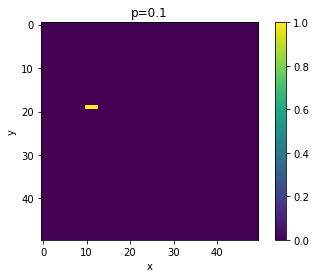

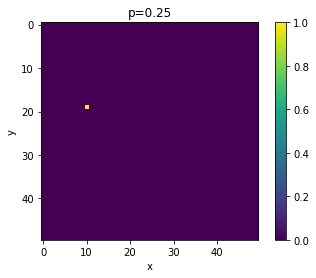

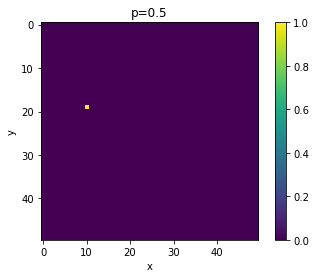

[19, 11]
New_s  [19 11]
seed  [[19 10]
 [19 11]]
neighbours1  [[18 10]
 [19  9]
 [19 11]]
neighbours2  [[18 10]
 [19  9]]
neighbours3  [[18 10]
 [19  9]
 [18 11]
 [20 11]
 [19 12]]


KeyboardInterrupt: 

In [52]:
P_s = [0.1,0.25,0.5,0.75,0.80,0.9]

for p in P_s:
    Y = np.copy(grid2)
    seed = np.array([[N-1,round((N-1)/2)]])
    Y[seed[0, 0],seed[0, 1]] = 1
    neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
    Y = random_walker(Y, seed, neighbours, 50000000, p)
    plt.imshow(Y,vmin=0, vmax=1)
    plt.title("p={}".format(p))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()

In [53]:
print(p)

0.75
